<a href="https://colab.research.google.com/github/Lee-Geunhee/Lee-Geunhee/blob/main/AI_11_%EC%9D%B4%EA%B7%BC%ED%9D%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 소고기 분류모델.

In [ ]:
# 고기사진으로 부위를 예측함으로써 
# 소비자는 보다 안심하고 구입할 수 있음.
# 기관에서 공급자를 감시하는 역할도 수행할 수 있음.

In [ ]:
# 소고기 부위는 크게 목심, 앞다리, 사테, 등심, 갈비, 양지, 채끝, 안심, 운둔, 설도, 사태 11부위이며
# 더 세분화 하면 30가지가 넘음,
# 그중에서 등심, 안심을 구분하는 모델을 만들고자 함

In [ ]:
# 구글, 인스타, 트위터에서 수집한 등심, 안심 사진 각각 400개를 선정

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
import numpy as np
from keras.preprocessing import image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
img=image.load_img('/content/다운로드.jpg', target_size=(150, 150))

In [ ]:
base_dir = '/content/drive/MyDrive'

In [ ]:
train_sirloin_dir = os.path.join('/content/drive/MyDrive/Untitled Folder/train/sirloin_train')
train_tenderloin_dir = os.path.join('/content/drive/MyDrive/Untitled Folder/train/tenderloin_train')
test_sirloin_dir = os.path.join('/content/drive/MyDrive/Untitled Folder/test/sirloin_test')
test_tenderloin_dir = os.path.join('/content/drive/MyDrive/Untitled Folder/test/tenderloin_test')

In [ ]:
train_sirloin_fnames = os.listdir(train_sirloin_dir)
train_tenderloin_fnames = os.listdir(train_tenderloin_dir)
test_sirloin_fnames = os.listdir(test_sirloin_dir)
test_tenderloin_fnames = os.listdir(test_tenderloin_dir)

In [ ]:
print(len(os.listdir(train_sirloin_dir)))
print(len(os.listdir(train_tenderloin_dir)))
print(len(os.listdir(test_sirloin_dir)))
print(len(os.listdir(test_tenderloin_dir)))

300
300
100
100


In [ ]:
# 등심 훈련 데이터 이미지 300개
# 안심 훈련 데이터 이미지 300개
# 등심 테스트 데이터 이미지 100개
# 안심 테스트 데이터 이미지 100개

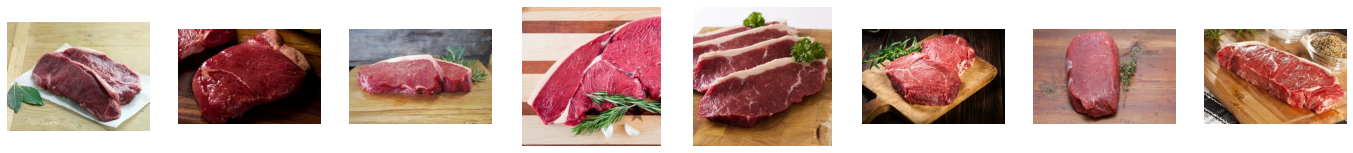

In [ ]:
nrows, ncols = 8,8
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

pic_index+=8

next_sirloin_pix = [os.path.join(train_sirloin_dir, fname)
                for fname in train_sirloin_fnames[ pic_index-8:pic_index]]


for i, img_path in enumerate(next_sirloin_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
# 등심 사진

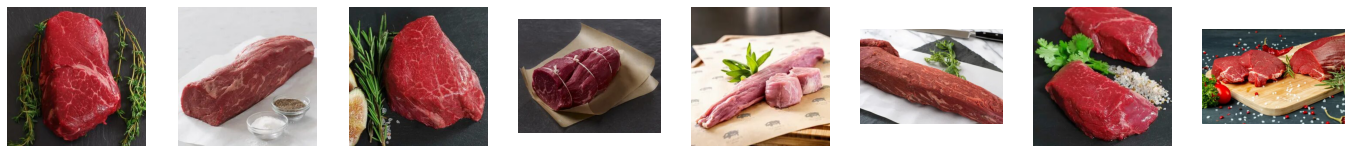

In [ ]:
nrows, ncols = 8,8
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

pic_index+=8



next_tenderloin_pix = [os.path.join(train_tenderloin_dir, fname)
                for fname in train_tenderloin_fnames[ pic_index-8:pic_index]]

for i, img_path in enumerate(next_tenderloin_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
# 안심 사진 

In [ ]:
model = Sequential() 
model.add(Flatten(input_shape=(150, 150, 3)))
model.add(Dense(16, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 67500)             0         
                                                                 
 dense (Dense)               (None, 16)                1080016   
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dense_3 (Dense)             (None, 128)               8320      
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,091,121
Trainable params: 1,091,121
Non-

In [ ]:
# 5개의 층
# relu 함수를 사용 
# 출력층은 sigmoid

In [ ]:
model.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics = ['accuracy'])

In [ ]:
# 옵티마이저 adam
# 분류문제기떄문에 손실함수는 binary_crossentropy

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1.0/255.)
test_datagen  = ImageDataGenerator(rescale = 1.0/255.)

In [ ]:
# 이미지 전처리
# 이미지를 불러올 때 폴더명에 맞춰 자동으로 labelling

In [ ]:
train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/Untitled Folder/train',
                                                  batch_size=20,
                                                  class_mode='binary',
                                                  target_size=(150, 150))

Found 600 images belonging to 2 classes.


In [ ]:
validation_generator =  test_datagen.flow_from_directory('/content/drive/MyDrive/Untitled Folder/test',
                                                       batch_size=20,
                                                       class_mode  = 'binary',
                                                       target_size = (150, 150))

Found 200 images belonging to 2 classes.


In [ ]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=20,
                    epochs=100,
                    validation_steps=5,
                    verbose=1)

Epoch 1/100
20/20 [==============================] - 76s 4s/step - loss: 0.7855 - accuracy: 0.5550 - val_loss: 0.9055 - val_accuracy: 0.4900
Epoch 2/100
20/20 [==============================] - 25s 1s/step - loss: 0.7204 - accuracy: 0.5775 - val_loss: 0.7760 - val_accuracy: 0.5100
Epoch 3/100
20/20 [==============================] - 10s 521ms/step - loss: 0.6839 - accuracy: 0.6225 - val_loss: 0.7797 - val_accuracy: 0.5200
Epoch 4/100
20/20 [==============================] - 6s 303ms/step - loss: 0.7167 - accuracy: 0.5675 - val_loss: 0.7195 - val_accuracy: 0.5300
Epoch 5/100
20/20 [==============================] - 4s 196ms/step - loss: 0.7336 - accuracy: 0.5075 - val_loss: 0.7088 - val_accuracy: 0.5000
Epoch 6/100
20/20 [==============================] - 3s 142ms/step - loss: 0.6594 - accuracy: 0.6250 - val_loss: 0.7260 - val_accuracy: 0.4800
Epoch 7/100
20/20 [==============================] - 2s 121ms/step - loss: 0.6612 - accuracy: 0.6075 - val_loss: 0.7466 - val_accuracy: 0.5500
Ep

<Figure size 432x288 with 0 Axes>

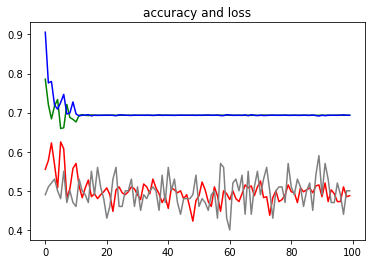

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'red')
plt.plot(epochs, val_acc, 'grey')
plt.plot(epochs, loss, 'green')
plt.plot(epochs, val_loss, 'blue')
plt.title('accuracy and loss')

plt.figure()


In [ ]:
# 빨간색이 훈련정확도, 회색이 검증정확도
# 전혀 학습이 되고 있지 않음.
# 초록색이 loss, 파란색이 validation loss

In [ ]:
# 처음엔 검색어로 크롤링한 이미지 1000개로 실행 하였으나 성능이 나오지 않았음.
# 사진들 중 랩이나 종이로 쌓여있거나, 방송화면을 캡쳐한 사진들 200장 정도를 추려 800개로 실행하였으나 또 성능이 나오지 않음. 

In [ ]:
# 아마 사진데이터를 무작위로 수집하여 
# 배경사진이나 주위 장식품, 사진구도, 화질차이 등 균일한 데이터가 아닐라 결과가 좋지 않은 것으로 추측.
# 또한 검색어로 수집한 이미지 이기때문에 안심을 검색했다고해서 안심사진이 아닐 수도 있음.

In [ ]:
# 일정 성능이 나올 수 있도록 데이터 전처리를 다시 해볼 예정